(60000, 28, 28)
(10000, 28, 28)


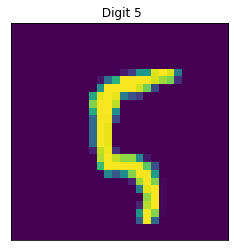

0 255


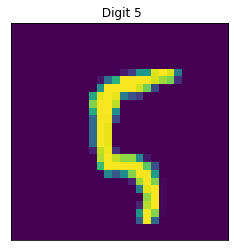

0.0 1.0


In [8]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras import backend as K
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# helper functions
def show_min_max(array, i):
  random_image = array[i]
  print(random_image.min(), random_image.max())

def plot_image(array, i, labels):
  plt.imshow(np.squeeze(array[i]))
  plt.title(" Digit " + str(labels[i]))
  plt.xticks([])
  plt.yticks([])
  plt.show()

img_rows, img_cols = 28, 28  
num_classes = 10
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
(train_images_backup, train_labels_backup), (test_images_backup, test_labels_backup) = mnist.load_data()
print(train_images.shape) 
print(test_images.shape)

train_images = train_images.reshape(train_images.shape[0],  img_rows, img_cols, 1) 
test_images = test_images.reshape(test_images.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

plot_image(train_images, 100, train_labels)
show_min_max(train_images, 100) 

train_images = train_images.astype('float32') 
test_images = test_images.astype('float32') 
train_images /= 255 
test_images /= 255
plot_image(train_images, 100, train_labels) 
show_min_max(train_images, 100)

train_labels = keras.utils.to_categorical(train_labels, num_classes) 
test_labels = keras.utils.to_categorical(test_labels, num_classes)

In [9]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout

epochs=10
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(Dropout(0.3))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy', optimizer='rmsprop',  metrics=['accuracy']) 

model.fit(train_images, train_labels, batch_size=64, epochs=epochs, validation_data=(test_images, test_labels), shuffle=True)

test_loss, test_acc=model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 dropout_1 (Dropout)         (None, 11, 11, 64)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 9, 9, 32)          18464     
                                                                 
 flatten_1 (Flatten)         (None, 2592)              0         
                                                      

In [10]:
model.save('my_model.h5') 